<a href="https://colab.research.google.com/github/ronsuitNES23/ronsuitNES23/blob/main/The_Titanic_Survival_Metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries, Directory and Data

In [1]:
%cd /content/drive/MyDrive/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Statistics and Descriptive Analytics/Logistic Regression


In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [3]:
df = pd.read_csv("titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
df = df.drop(columns = "Name")
df.head(2)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Siblings/Spouses Aboard'}>],
       [<Axes: title={'center': 'Parents/Children Aboard'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

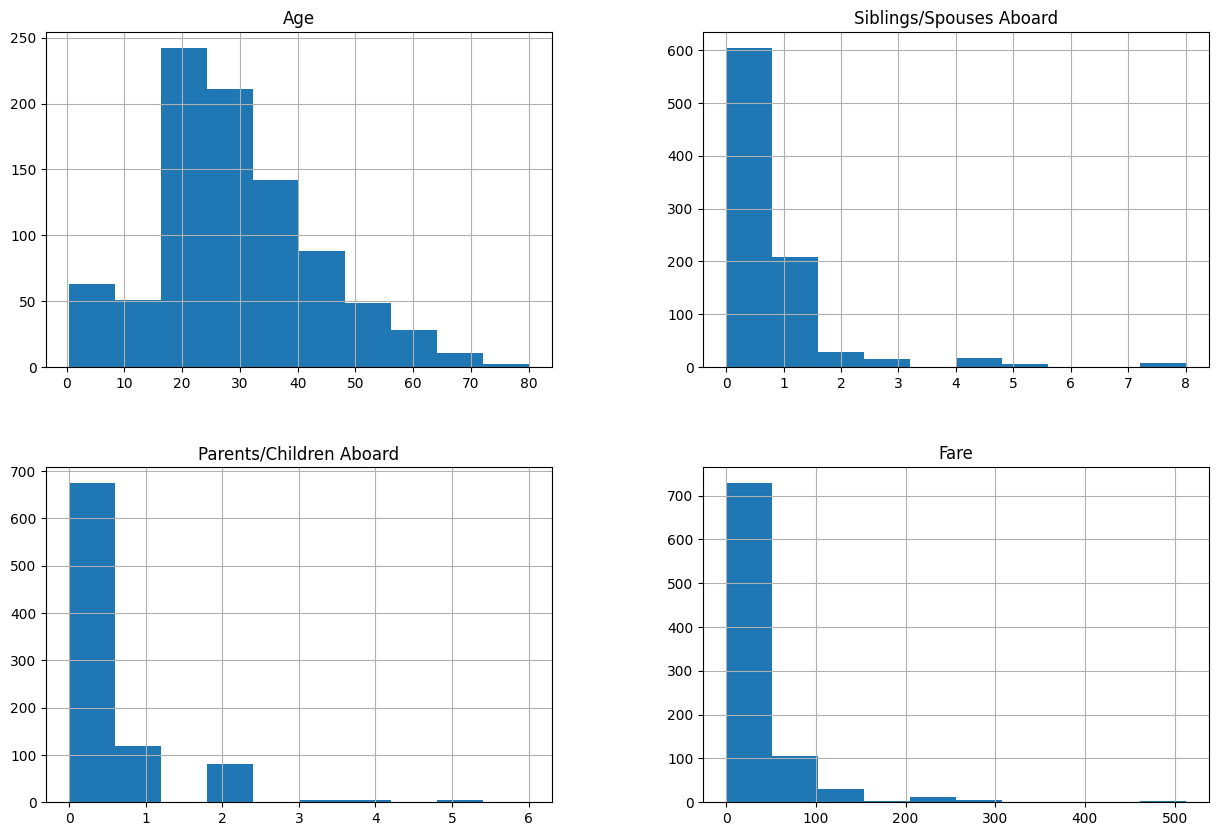

In [6]:
df[[ 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']].hist(figsize =(15,10))

In [7]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


884
884


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Siblings/Spouses Aboard'}>],
       [<Axes: title={'center': 'Parents/Children Aboard'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

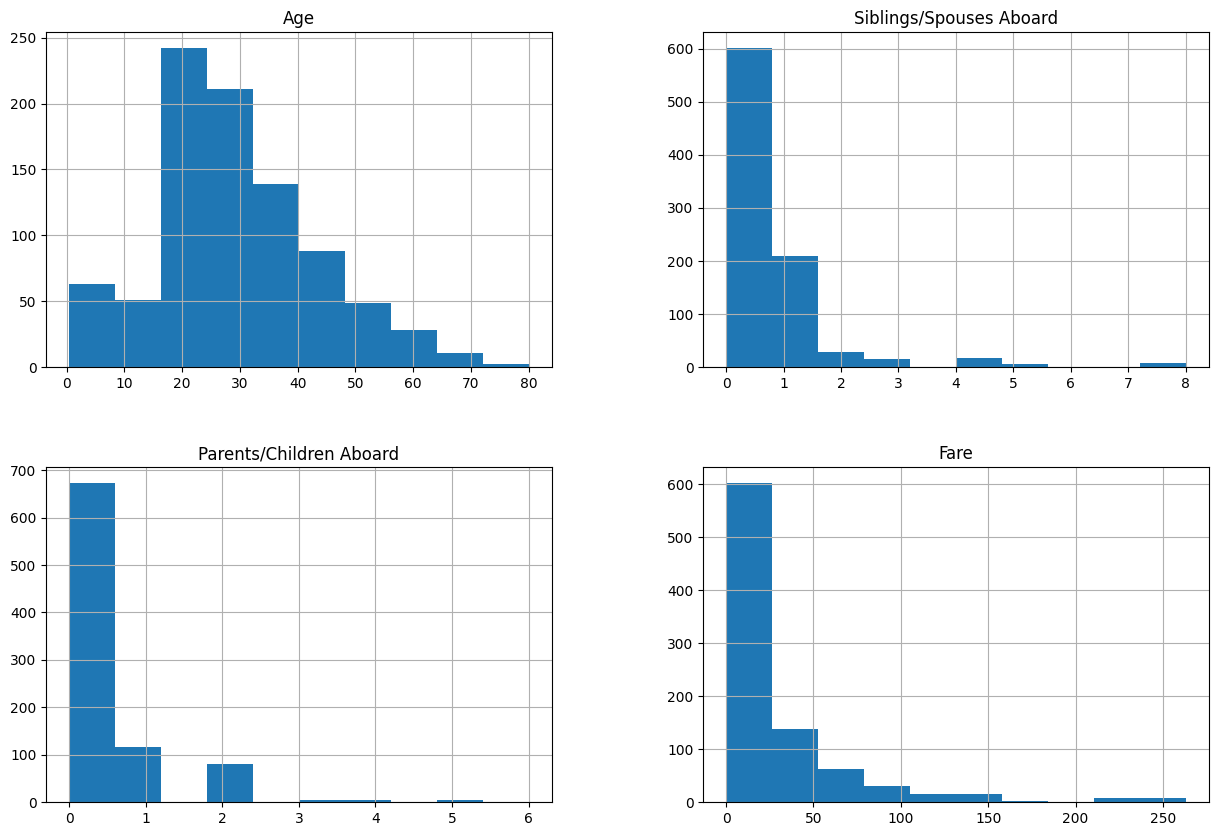

In [9]:
print(len(df))
df = df[df['Fare'] < 500]
print(len(df))
df[[ 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']].hist(figsize =(15,10))

<ipython-input-13-175d53aef8b9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

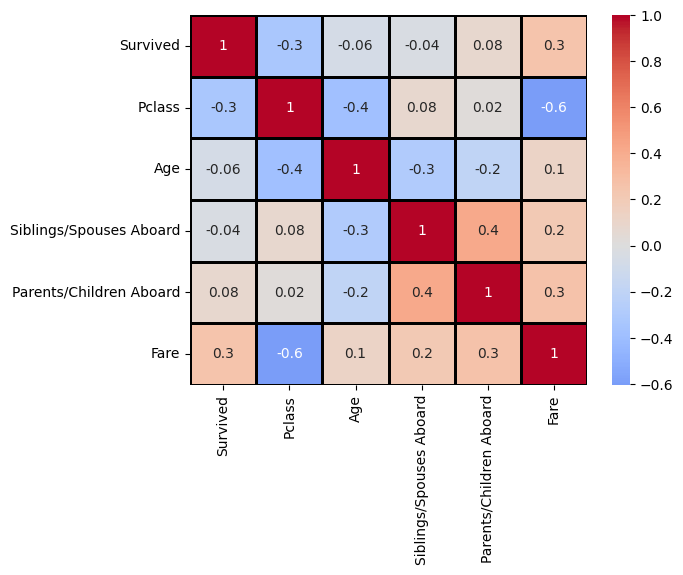

In [13]:
sns.heatmap(df.corr(),
           annot = True,
           fmt = '.1g',
            center= 0,
            cmap= 'coolwarm',
            linewidths= 1,
            linecolor= 'black')

In [14]:
df['Sex'] = np.where(df['Sex'] == 'male', 1, 0)
df.head(2)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833


In [15]:
#Isolating X and Y
Y = df['Survived']
X = df.drop(columns= 'Survived')
X = sm.add_constant(X)
X.head()

,const,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,1.0,3,1,22.0,1,0,7.2500
1,1.0,1,0,38.0,1,0,71.2833
2,1.0,3,0,26.0,0,0,7.9250
3,1.0,1,0,35.0,1,0,53.1000
4,1.0,3,1,35.0,0,0,8.0500


In [16]:
# Training and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size= 0.2,
                                                    random_state = 1502)

In [17]:
#Logistic Regression
model = sm.Logit(y_train, x_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.444139
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  707
Model:                          Logit   Df Residuals:                      700
Method:                           MLE   Df Model:                            6
Date:                Sat, 26 Aug 2023   Pseudo R-squ.:                  0.3341
Time:                        14:15:26   Log-Likelihood:                -314.01
converged:                       True   LL-Null:                       -471.56
Covariance Type:            nonrobust   LLR p-value:                 4.721e-65
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.2221      0.639      8.168      0.000       3.969   

In [18]:
# Create the function for reading the log
def log_reader(coefficient):
  probability = ((np.exp(coefficient) -1) * 100).round(2)
  if probability > 0:
    print(f"The likelihood by {probability}%")
  elif probability == 0:
    print('no impact')
  else:
    print(f"The likelihood decreases by {abs(probability)}%")


In [19]:
# Apply the function
log_reader(-1.1476)

The likelihood decreases by 68.26%


In [20]:
predictions = model.predict(x_test)
predictions = np.where(predictions > 0.5, 1, 0)
predictions[:5]

array([1, 0, 0, 0, 0])

In [21]:
# Checking if Dataset is balanced
y_test.mean()

0.3728813559322034

In [22]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

[[98 13]
 [22 44]]


In [23]:
# Accuracy
Accuracy = (tn + tp )/ (tn + fp + fn + tp)
print(f"The accuracy is {(Accuracy * 100).round(1)}%")

# F1-Score
f1 = 2* tp /(2* tp + fn + fp)
print(f"The f1-Score is {(f1*100).round(1)}")

# Specificity
specificity = tn/(tn + fp)
print(f"The specificity is {(specificity*100).round(1)}%")

# Sensitivity
sensitivity = tp/(tp+ fn)
print(f"The sensitivity is {(sensitivity* 100).round(1)}%")

The accuracy is 80.2%
The f1-Score is 71.5
The specificity is 88.3%
The sensitivity is 66.7%


In [24]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       111
           1       0.77      0.67      0.72        66

    accuracy                           0.80       177
   macro avg       0.79      0.77      0.78       177
weighted avg       0.80      0.80      0.80       177

